# Lesson 1a: Perceptron Learning

In this lesson you will implement one of the first algorithms from the history of neural networks: the perceptron.

You will NOT be using Keras/Tensorflow or other machine learning toolkits for this problem. Instead, you will implement the perceptron learning rule yourself.

Read over the code below. Much has already been done. Areas where you need to add your own code are marked with "TODO" comments.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [2]:
# Import the 'iris' dataset.
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use the first two features.
y = iris.target
x_min = min(X[:, 0])
x_max = max(X[:, 0])

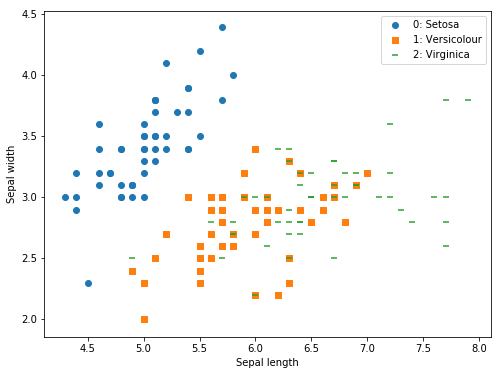

In [3]:
# Plot the data points.
def make_plot():
    plt.figure(figsize=(8, 6))
    markers = ['o', 's', '_']
    colors = 'tab:blue', 'tab:orange', 'tab:green'
    for i, cat in enumerate(np.unique(y)):
        plt.scatter(X[:, 0][y==cat], X[:, 1][y==cat], c=colors[i], marker=markers[i])
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.legend(['0: Setosa', '1: Versicolour', '2: Virginica'])
make_plot()

## Build a perceptron to distinguish Setosa from the other two varieties

Versicolour and Virginica are intermixed in this plot; note that some datapoints have identical (length, width) values but differente categories! Thus, we will focus on distinguishing Setosa from the other two, because perceptrons require data to be linearlly separable.

The perceptron will have a simple structure:
    
    * Two input nodes: one for Sepal length, one for Sepal width.
    * One output node: the output will be 0 for Setosa (category 0), and 1 for either of the other two categories.

In [4]:
class Perceptron():
    """Simple perceptron with 2 inputs and 1 output."""
    
    def __init__(self):
        # Initialize the perceptron weights and the bias term.
        self._w = [0, 0]
        self._b = 0
        # Add properties for tracking the accuracy during training
        self._accuracy_tracker = []
        self._acc = 0
    
    def predict(self, x, verbose=False):
        """x is the input weight vector. Output is the result of running the perceptron on this input.
        
        Implement the Perceptron rule that involves multiplying weights by input, adding in bias, using a threshold, etc.
        
        The returned output should be 1 or 0.
        
        Use the "verbose" flag to print debugging info if desired.
        """
        # Compute z as dot product of weights and x plus the bias term
        z = np.dot(self._w,x) + self._b
        # Assuming a threshold of zero, return 1 if z > 0, 0 otherwise
        y = 1 if z > 0 else 0
        
        if verbose:
            # Print computation results here if desired.
            print('--> Inside predict. Current weights: %s' % self._w)
            print('--> Inside predict. Current bias: %s' % self._b)
            print('--> Inside predict. X values: %s' % x)
            print('--> Inside predict. z value: %f' % z)
            print('--> Inside predict. y value: %f' % y)
            pass
        
        return y
        
    def accuracy(self, x, y):
        """Compute the total % accuracy over a set of inputs x and corresponding outputs y."""
        correct = 0
        for i in range(len(x)):
            example_x = x[i]
            example_y = y[i]
            if self.predict(example_x) == example_y:
                correct += 1
        return float(correct) / len(x)
            
    def update_weights(self, x, target, verbose=False):
        """Update the perceptron's weights according to the perceptron learning rule.
        
        x is an input example, and target is the desired output.
        
        This function should modify self._b and self._w. It has no return value.
        
        Use the "verbose" flag to print debugging info if desired.
        """
        current_output = self.predict(x, verbose)

        if verbose:
            print('--> Inside update weights. Target = %f' % target)
            print('--> Inside update weights. Current output = %f' % current_output)
        
        # Update weights and bias
        self._w += (target - current_output) * x
        # For bias term, assume x = 1
        self._b += (target - current_output)
        
    def train(self, x, y, num_iterations, verbose=False):
        """Train the perceptron for the given number of iterations on the input data x with 
        corresponding target values y.
        
        Use the "verbose" flag to print debugging info if desired.
        """
        assert(len(x) == len(y))
        for i in range(num_iterations):
            print('Iter #%d' % i)
            for j in range(len(x)):
                example_x = x[j]
                example_y = y[j]

                # Train the perceptron on this input/output example pair (example_x, example_y).
                # This should update the perceptron's weights.
                self.update_weights(example_x, example_y, verbose)
                
                if verbose:
                    print('--> Inside train. Weights:', self._w)
                    print('--> Inside train. Bias:', self._b)                      
                    pass
                    
            # Print some useful info during training.
            print('Weights:', self._w)
            print('Bias:', self._b)  
            acc = self.accuracy(x, y)
            self._acc = acc*100
            self._accuracy_tracker.append(acc*100)
            print('Accuracy: %.3f%%' % (acc * 100))
            print()
            # Stop early if 100% accuracy achieved
            if abs(acc-1) < 1e-6:
                print('100% accuracy achieved. Exiting...')
                return
            

## Set up dataset for training a Setosa/not-Setosa classifier

In [5]:
def get_shuffled_data(x, y):
    """Convenient function to shuffle data and outputs, to inject some randomness into training."""
    # Create shuffle pattern of indices.
    s = np.arange(x.shape[0])
    np.random.shuffle(s)
    
    # Apply suffle pattern to x and y.
    x_shuffled = x[s]
    y_shuffled = y[s]
    return x_shuffled, y_shuffled

In [6]:
# Map data labels to just two categories.
y_two_categories = np.array([0 if i==0 else 1 for i in y])

In [7]:
X_shuffled, y_shuffled = get_shuffled_data(X, y_two_categories)

## Train a perceptron on the shuffled data
Try to get as high an accuracy as possible.

In [8]:
p = Perceptron()
# Train the model
p.train(X_shuffled,y_shuffled,10000,verbose=False)

Iter #0
Weights: [  7.5 -12.1]
Bias: -2
Accuracy: 99.333%

Iter #1
Weights: [ 12.7 -21.2]
Bias: -3
Accuracy: 99.333%

Iter #2
Weights: [ 16.  -26.9]
Bias: -4
Accuracy: 99.333%

Iter #3
Weights: [ 19.6 -32.3]
Bias: -5
Accuracy: 99.333%

Iter #4
Weights: [ 23.2 -37.8]
Bias: -6
Accuracy: 99.333%

Iter #5
Weights: [ 25.  -41.3]
Bias: -7
Accuracy: 99.333%

Iter #6
Weights: [ 27.3 -45.4]
Bias: -8
Accuracy: 99.333%

Iter #7
Weights: [ 32.1 -45.9]
Bias: -8
Accuracy: 88.000%

Iter #8
Weights: [ 29.7 -48. ]
Bias: -9
Accuracy: 99.333%

Iter #9
Weights: [ 30.9 -48.1]
Bias: -9
Accuracy: 98.667%

Iter #10
Weights: [ 31.  -52.4]
Bias: -10
Accuracy: 98.667%

Iter #11
Weights: [ 33.5 -52. ]
Bias: -10
Accuracy: 98.667%

Iter #12
Weights: [ 33.  -55.8]
Bias: -11
Accuracy: 98.000%

Iter #13
Weights: [ 35.5 -55.4]
Bias: -11
Accuracy: 98.667%

Iter #14
Weights: [ 40.1 -55.7]
Bias: -11
Accuracy: 84.667%

Iter #15
Weights: [ 36.2 -58.7]
Bias: -12
Accuracy: 99.333%

Iter #16
Weights: [ 37.3 -58.3]
Bias: -12
Ac

Accuracy: 99.333%

Iter #168
Weights: [ 64.4 -84.2]
Bias: -63
Accuracy: 98.667%

Iter #169
Weights: [ 60.4 -86.5]
Bias: -64
Accuracy: 99.333%

Iter #170
Weights: [ 61.8 -85.8]
Bias: -64
Accuracy: 99.333%

Iter #171
Weights: [ 63.2 -84.9]
Bias: -64
Accuracy: 99.333%

Iter #172
Weights: [ 64.1 -84.2]
Bias: -64
Accuracy: 98.667%

Iter #173
Weights: [ 60.1 -86.5]
Bias: -65
Accuracy: 99.333%

Iter #174
Weights: [ 61.5 -85.8]
Bias: -65
Accuracy: 99.333%

Iter #175
Weights: [ 62.9 -84.9]
Bias: -65
Accuracy: 99.333%

Iter #176
Weights: [ 65.8 -83.6]
Bias: -65
Accuracy: 94.667%

Iter #177
Weights: [ 62.4 -85.9]
Bias: -66
Accuracy: 99.333%

Iter #178
Weights: [ 63.8 -85. ]
Bias: -66
Accuracy: 99.333%

Iter #179
Weights: [ 64.7 -84.3]
Bias: -66
Accuracy: 98.667%

Iter #180
Weights: [ 60.7 -86.6]
Bias: -67
Accuracy: 99.333%

Iter #181
Weights: [ 62.1 -85.9]
Bias: -67
Accuracy: 99.333%

Iter #182
Weights: [ 63.5 -85. ]
Bias: -67
Accuracy: 99.333%

Iter #183
Weights: [ 64.4 -84.3]
Bias: -67
Accuracy

Weights: [ 65.3 -82.9]
Bias: -105
Accuracy: 99.333%

Iter #341
Weights: [ 65.8 -82.9]
Bias: -105
Accuracy: 99.333%

Iter #342
Weights: [ 67.6 -81.9]
Bias: -105
Accuracy: 99.333%

Iter #343
Weights: [ 69. -81.]
Bias: -105
Accuracy: 99.333%

Iter #344
Weights: [ 69.9 -80.3]
Bias: -105
Accuracy: 98.667%

Iter #345
Weights: [ 65.9 -82.6]
Bias: -106
Accuracy: 99.333%

Iter #346
Weights: [ 67.7 -81.6]
Bias: -106
Accuracy: 99.333%

Iter #347
Weights: [ 69.1 -80.7]
Bias: -106
Accuracy: 99.333%

Iter #348
Weights: [ 70.6 -80. ]
Bias: -106
Accuracy: 96.667%

Iter #349
Weights: [ 66.1 -82.3]
Bias: -107
Accuracy: 99.333%

Iter #350
Weights: [ 67.5 -81.4]
Bias: -107
Accuracy: 99.333%

Iter #351
Weights: [ 68.9 -80.5]
Bias: -107
Accuracy: 99.333%

Iter #352
Weights: [ 69.8 -79.8]
Bias: -107
Accuracy: 98.667%

Iter #353
Weights: [ 65.8 -82.1]
Bias: -108
Accuracy: 100.000%

100% accuracy achieved. Exiting...


The section below plots the accuracy as a function of the iteration number. Note that the algorithm was modified to stop if the accuracy achieves 100% before the given number of iterations.

Accuracy using current parameters: 100.00%


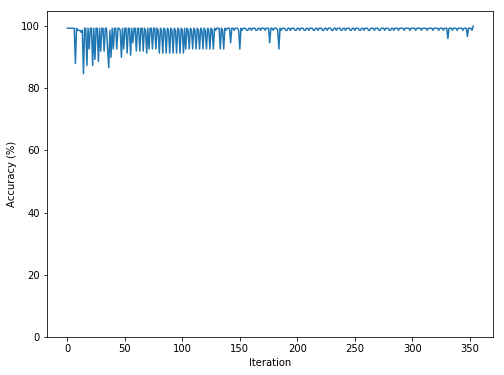

In [9]:
print('Accuracy using current parameters: %4.2f%%' % p._acc)
plt.figure(figsize=(8,6))
plt.xlabel('Iteration')
plt.ylabel('Accuracy (%)')
plt.ylim(0,105)
plt.plot(p._accuracy_tracker)

## Plot the learned perceptron decision boundary

Our perceptron makes decisions based on the value of b + w1x1 + w2x2. We can set this to 0 and solve to find the decision boundary. 

Complete the function below to compute x2 (the y axis in the plot above) as a function of b, w1, x1, w2 for a given perceptron:  
x2 = (-b - w1x1) / w2

In [10]:
def get_y_decision_boundary(x1, perceptron):
    x2 = (-perceptron._b - perceptron._w[0]*x1)/perceptron._w[1]
    return x2

### Compute the decision boundary for the perceptron trained above, and plot it.

In [11]:
y1 = get_y_decision_boundary(x_min, p)
y2 = get_y_decision_boundary(x_max, p)
y1, y2

(2.1308160779537952, 5.016077953715149)

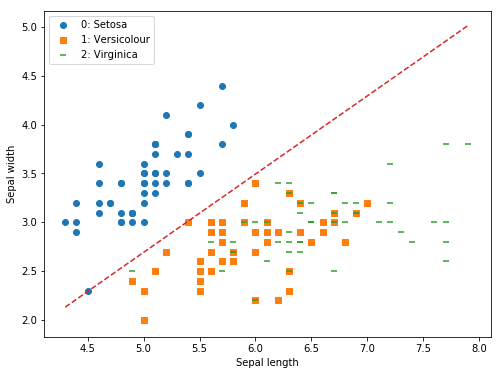

In [12]:
make_plot()
plt.plot([x_min,x_max], [y1,y2], ls='dashed', c='tab:red')

## Another model: Virginica/not-Virginica classifier

Build a new model, but grouping categories 0 and 1 together, trying to separate out Virginica from the other two classes.

In [13]:
y_two_categories_2 = np.array([0 if i==2 else 1 for i in y])

In [14]:
X_shuffled, y_shuffled = get_shuffled_data(X, y_two_categories_2)
p2 = Perceptron()
# Train the perceptron
p2.train(X_shuffled,y_shuffled,10000,verbose=False)

Iter #0
Weights: [-10.4  10.1]
Bias: 3
Accuracy: 33.333%

Iter #1
Weights: [-12.6  17.8]
Bias: 6
Accuracy: 58.667%

Iter #2
Weights: [-16.7  24.8]
Bias: 9
Accuracy: 65.333%

Iter #3
Weights: [-17.9  28.4]
Bias: 12
Accuracy: 67.333%

Iter #4
Weights: [-20.3  30.3]
Bias: 15
Accuracy: 66.000%

Iter #5
Weights: [-21.   30.7]
Bias: 17
Accuracy: 66.000%

Iter #6
Weights: [-20.5  33.5]
Bias: 20
Accuracy: 70.667%

Iter #7
Weights: [-22.8  33.2]
Bias: 22
Accuracy: 66.000%

Iter #8
Weights: [-21.5  34.2]
Bias: 25
Accuracy: 71.333%

Iter #9
Weights: [-23.5  35. ]
Bias: 27
Accuracy: 69.333%

Iter #10
Weights: [-22.1  35.9]
Bias: 30
Accuracy: 71.333%

Iter #11
Weights: [-23.4  35.5]
Bias: 32
Accuracy: 71.333%

Iter #12
Weights: [-27.   33.2]
Bias: 34
Accuracy: 65.333%

Iter #13
Weights: [-23.3  34.1]
Bias: 37
Accuracy: 71.333%

Iter #14
Weights: [-23.8  33.6]
Bias: 39
Accuracy: 72.000%

Iter #15
Weights: [-25.  34.]
Bias: 41
Accuracy: 70.667%

Iter #16
Weights: [-24.3  33.3]
Bias: 43
Accuracy: 71.3

Accuracy: 78.667%

Iter #167
Weights: [-36.9  11.9]
Bias: 188
Accuracy: 80.000%

Iter #168
Weights: [-41.5  10.3]
Bias: 188
Accuracy: 65.333%

Iter #169
Weights: [-36.5  11. ]
Bias: 189
Accuracy: 79.333%

Iter #170
Weights: [-40.2   8.9]
Bias: 189
Accuracy: 66.667%

Iter #171
Weights: [-41.8  10.3]
Bias: 189
Accuracy: 64.667%

Iter #172
Weights: [-36.8  11. ]
Bias: 190
Accuracy: 80.000%

Iter #173
Weights: [-41.4   9.6]
Bias: 190
Accuracy: 65.333%

Iter #174
Weights: [-36.4  10.3]
Bias: 191
Accuracy: 80.000%

Iter #175
Weights: [-40.1   8.2]
Bias: 191
Accuracy: 66.667%

Iter #176
Weights: [-36.4  13.2]
Bias: 192
Accuracy: 80.000%

Iter #177
Weights: [-40.7   9.7]
Bias: 192
Accuracy: 68.667%

Iter #178
Weights: [-36.6  13.7]
Bias: 193
Accuracy: 78.667%

Iter #179
Weights: [-40.9  10.2]
Bias: 193
Accuracy: 68.667%

Iter #180
Weights: [-36.8  14. ]
Bias: 194
Accuracy: 78.667%

Iter #181
Weights: [-37.8  11.8]
Bias: 194
Accuracy: 80.000%

Iter #182
Weights: [-41.7   9.1]
Bias: 194
Accuracy

Iter #332
Weights: [-44.2   8. ]
Bias: 243
Accuracy: 80.000%

Iter #333
Weights: [-46.3   6.2]
Bias: 243
Accuracy: 74.667%

Iter #334
Weights: [-48.9   7.4]
Bias: 243
Accuracy: 67.333%

Iter #335
Weights: [-44.5  11.1]
Bias: 244
Accuracy: 81.333%

Iter #336
Weights: [-45.1  10.3]
Bias: 244
Accuracy: 80.667%

Iter #337
Weights: [-45.7   7.8]
Bias: 244
Accuracy: 78.000%

Iter #338
Weights: [-48.5   6.7]
Bias: 244
Accuracy: 68.000%

Iter #339
Weights: [-43.3   9.7]
Bias: 245
Accuracy: 80.000%

Iter #340
Weights: [-45.1   9.1]
Bias: 245
Accuracy: 80.000%

Iter #341
Weights: [-45.5   7. ]
Bias: 245
Accuracy: 78.000%

Iter #342
Weights: [-48.3   5.9]
Bias: 245
Accuracy: 68.000%

Iter #343
Weights: [-43.1   8.9]
Bias: 246
Accuracy: 80.000%

Iter #344
Weights: [-44.9   8.3]
Bias: 246
Accuracy: 80.000%

Iter #345
Weights: [-47.    6.5]
Bias: 246
Accuracy: 74.667%

Iter #346
Weights: [-49.6   7.7]
Bias: 246
Accuracy: 68.000%

Iter #347
Weights: [-45.4  10. ]
Bias: 247
Accuracy: 80.667%

Iter #34

Iter #473
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #474
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #475
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #476
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #477
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #478
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #479
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #480
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #481
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #482
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #483
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #484
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #485
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #486
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #487
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #488
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #48

Iter #608
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #609
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #610
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #611
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #612
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #613
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #614
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #615
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #616
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #617
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #618
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #619
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #620
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #621
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #622
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #623
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #62

Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #743
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #744
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #745
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #746
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #747
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #748
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #749
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #750
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #751
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #752
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #753
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #754
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #755
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #756
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #757
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #758
Weights:

Accuracy: 82.667%

Iter #881
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #882
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #883
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #884
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #885
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #886
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #887
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #888
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #889
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #890
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #891
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #892
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #893
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #894
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #895
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #896
Weights: [-43.    3.7]
Bias: 252
Accuracy

Accuracy: 82.667%

Iter #1051
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #1052
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #1053
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #1054
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #1055
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #1056
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #1057
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #1058
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #1059
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #1060
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #1061
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #1062
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #1063
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #1064
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #1065
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #1066
Weights: [-43.2   4.2]
Bi

Accuracy: 82.667%

Iter #1224
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #1225
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #1226
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #1227
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #1228
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #1229
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #1230
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #1231
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #1232
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #1233
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #1234
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #1235
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #1236
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #1237
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #1238
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #1239
Weights: [-43.1   3.9]
Bi

Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #1395
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #1396
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #1397
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #1398
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #1399
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #1400
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #1401
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #1402
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #1403
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #1404
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #1405
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #1406
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #1407
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #1408
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #1409
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Ite

Iter #1566
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #1567
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #1568
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #1569
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #1570
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #1571
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #1572
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #1573
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #1574
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #1575
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #1576
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #1577
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #1578
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #1579
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #1580
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #1581
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 8

Accuracy: 82.667%

Iter #1738
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #1739
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #1740
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #1741
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #1742
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #1743
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #1744
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #1745
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #1746
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #1747
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #1748
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #1749
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #1750
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #1751
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #1752
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #1753
Weights: [-42.9   3.5]
Bi

Accuracy: 82.667%

Iter #1869
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #1870
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #1871
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #1872
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #1873
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #1874
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #1875
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #1876
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #1877
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #1878
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #1879
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #1880
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #1881
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #1882
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #1883
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #1884
Weights: [-42.8   3.3]
Bi

Accuracy: 82.667%

Iter #2171
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #2172
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #2173
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #2174
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #2175
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #2176
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #2177
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #2178
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #2179
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #2180
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #2181
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #2182
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #2183
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #2184
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #2185
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #2186
Weights: [-43.    3.7]
Bi

Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #2303
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #2304
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #2305
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #2306
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #2307
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #2308
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #2309
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #2310
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #2311
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #2312
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #2313
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #2314
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #2315
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #2316
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #2317
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Ite

Iter #2475
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #2476
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #2477
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #2478
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #2479
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #2480
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #2481
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #2482
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #2483
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #2484
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #2485
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #2486
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #2487
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #2488
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #2489
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #2490
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 8

Accuracy: 82.667%

Iter #2616
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #2617
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #2618
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #2619
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #2620
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #2621
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #2622
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #2623
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #2624
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #2625
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #2626
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #2627
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #2628
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #2629
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #2630
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #2631
Weights: [-43.1   3.9]
Bi

Accuracy: 82.667%

Iter #2751
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #2752
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #2753
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #2754
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #2755
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #2756
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #2757
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #2758
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #2759
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #2760
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #2761
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #2762
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #2763
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #2764
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #2765
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #2766
Weights: [-42.8   3.3]
Bi

Iter #2897
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #2898
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #2899
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #2900
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #2901
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #2902
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #2903
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #2904
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #2905
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #2906
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #2907
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #2908
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #2909
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #2910
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #2911
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #2912
Weights: [-43.    3.7]
Bias: 252
Accuracy: 8

Accuracy: 82.667%

Iter #3032
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #3033
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #3034
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #3035
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #3036
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #3037
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #3038
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #3039
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #3040
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #3041
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #3042
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #3043
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #3044
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #3045
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #3046
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #3047
Weights: [-43.3   4.4]
Bi

Accuracy: 82.667%

Iter #3165
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #3166
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #3167
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #3168
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #3169
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #3170
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #3171
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #3172
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #3173
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #3174
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #3175
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #3176
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #3177
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #3178
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #3179
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #3180
Weights: [-42.8   3.3]
Bi

Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #3307
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #3308
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #3309
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #3310
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #3311
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #3312
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #3313
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #3314
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #3315
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #3316
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #3317
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #3318
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #3319
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #3320
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #3321
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Ite

Accuracy: 82.667%

Iter #3442
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #3443
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #3444
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #3445
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #3446
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #3447
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #3448
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #3449
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #3450
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #3451
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #3452
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #3453
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #3454
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #3455
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #3456
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #3457
Weights: [-42.9   3.5]
Bi

Accuracy: 82.667%

Iter #3578
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #3579
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #3580
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #3581
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #3582
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #3583
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #3584
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #3585
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #3586
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #3587
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #3588
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #3589
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #3590
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #3591
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #3592
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #3593
Weights: [-43.3   4.4]
Bi


Iter #3738
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #3739
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #3740
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #3741
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #3742
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #3743
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #3744
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #3745
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #3746
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #3747
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #3748
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #3749
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #3750
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #3751
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #3752
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #3753
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 

Bias: 252
Accuracy: 82.667%

Iter #3907
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #3908
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #3909
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #3910
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #3911
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #3912
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #3913
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #3914
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #3915
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #3916
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #3917
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #3918
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #3919
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #3920
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #3921
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #3922
Weights: [-43.2

Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #4079
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #4080
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #4081
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #4082
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #4083
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #4084
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #4085
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #4086
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #4087
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #4088
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #4089
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #4090
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #4091
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #4092
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #4093
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Ite

Accuracy: 82.667%

Iter #4249
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #4250
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #4251
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #4252
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #4253
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #4254
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #4255
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #4256
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #4257
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #4258
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #4259
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #4260
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #4261
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #4262
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #4263
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #4264
Weights: [-43.2   4.2]
Bi

Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #4421
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #4422
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #4423
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #4424
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #4425
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #4426
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #4427
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #4428
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #4429
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #4430
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #4431
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #4432
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #4433
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #4434
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #4435
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Ite

Iter #4592
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #4593
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #4594
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #4595
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #4596
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #4597
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #4598
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #4599
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #4600
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #4601
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #4602
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #4603
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #4604
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #4605
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #4606
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #4607
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 8

Bias: 252
Accuracy: 82.667%

Iter #4764
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #4765
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #4766
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #4767
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #4768
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #4769
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #4770
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #4771
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #4772
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #4773
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #4774
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #4775
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #4776
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #4777
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #4778
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #4779
Weights: [-43.1

Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #4935
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #4936
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #4937
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #4938
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #4939
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #4940
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #4941
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #4942
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #4943
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #4944
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #4945
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #4946
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #4947
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #4948
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #4949
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Ite

Accuracy: 82.667%

Iter #5098
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #5099
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #5100
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #5101
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #5102
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #5103
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #5104
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #5105
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #5106
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #5107
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #5108
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #5109
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #5110
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #5111
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #5112
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #5113
Weights: [-42.9   3.5]
Bi

Accuracy: 82.667%

Iter #5234
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #5235
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #5236
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #5237
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #5238
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #5239
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #5240
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #5241
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #5242
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #5243
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #5244
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #5245
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #5246
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #5247
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #5248
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #5249
Weights: [-43.3   4.4]
Bi

Accuracy: 82.667%

Iter #5369
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #5370
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #5371
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #5372
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #5373
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #5374
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #5375
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #5376
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #5377
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #5378
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #5379
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #5380
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #5381
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #5382
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #5383
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #5384
Weights: [-43.    3.7]
Bi

Accuracy: 82.667%

Iter #5505
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #5506
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #5507
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #5508
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #5509
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #5510
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #5511
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #5512
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #5513
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #5514
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #5515
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #5516
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #5517
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #5518
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #5519
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #5520
Weights: [-42.8   3.3]
Bi


Iter #5641
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #5642
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #5643
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #5644
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #5645
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #5646
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #5647
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #5648
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #5649
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #5650
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #5651
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #5652
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #5653
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #5654
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #5655
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #5656
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 

Iter #5777
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #5778
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #5779
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #5780
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #5781
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #5782
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #5783
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #5784
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #5785
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #5786
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #5787
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #5788
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #5789
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #5790
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #5791
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #5792
Weights: [-43.    3.7]
Bias: 252
Accuracy: 8


Iter #5913
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #5914
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #5915
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #5916
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #5917
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #5918
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #5919
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #5920
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #5921
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #5922
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #5923
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #5924
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #5925
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #5926
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #5927
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #5928
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 

Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #6049
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #6050
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #6051
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #6052
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #6053
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #6054
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #6055
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #6056
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #6057
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #6058
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #6059
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #6060
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #6061
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #6062
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #6063
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Ite

Iter #6184
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #6185
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #6186
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #6187
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #6188
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #6189
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #6190
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #6191
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #6192
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #6193
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #6194
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #6195
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #6196
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #6197
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #6198
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #6199
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 8

Accuracy: 82.667%

Iter #6318
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #6319
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #6320
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #6321
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #6322
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #6323
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #6324
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #6325
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #6326
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #6327
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #6328
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #6329
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #6330
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #6331
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #6332
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #6333
Weights: [-43.1   3.9]
Bi


Iter #6453
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #6454
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #6455
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #6456
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #6457
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #6458
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #6459
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #6460
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #6461
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #6462
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #6463
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #6464
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #6465
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #6466
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #6467
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #6468
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 

Accuracy: 82.667%

Iter #6589
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #6590
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #6591
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #6592
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #6593
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #6594
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #6595
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #6596
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #6597
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #6598
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #6599
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #6600
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #6601
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #6602
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #6603
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #6604
Weights: [-43.2   4.2]
Bi

Iter #6747
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #6748
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #6749
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #6750
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #6751
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #6752
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #6753
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #6754
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #6755
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #6756
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #6757
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #6758
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #6759
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #6760
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #6761
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #6762
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 8

Accuracy: 82.667%

Iter #6918
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #6919
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #6920
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #6921
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #6922
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #6923
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #6924
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #6925
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #6926
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #6927
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #6928
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #6929
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #6930
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #6931
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #6932
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #6933
Weights: [-43.1   3.9]
Bi

Accuracy: 82.667%

Iter #7089
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #7090
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #7091
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #7092
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #7093
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #7094
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #7095
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #7096
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #7097
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #7098
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #7099
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #7100
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #7101
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #7102
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #7103
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #7104
Weights: [-42.8   3.3]
Bi

Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #7259
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #7260
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #7261
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #7262
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #7263
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #7264
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #7265
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #7266
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #7267
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #7268
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #7269
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #7270
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #7271
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #7272
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #7273
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Ite

Accuracy: 82.667%

Iter #7427
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #7428
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #7429
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #7430
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #7431
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #7432
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #7433
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #7434
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #7435
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #7436
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #7437
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #7438
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #7439
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #7440
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #7441
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #7442
Weights: [-43.    3.7]
Bi

Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #7597
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #7598
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #7599
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #7600
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #7601
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #7602
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #7603
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #7604
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #7605
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #7606
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #7607
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #7608
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #7609
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #7610
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #7611
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Ite

Accuracy: 82.667%

Iter #7768
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #7769
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #7770
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #7771
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #7772
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #7773
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #7774
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #7775
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #7776
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #7777
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #7778
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #7779
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #7780
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #7781
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #7782
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #7783
Weights: [-42.9   3.5]
Bi

Accuracy: 82.667%

Iter #7935
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #7936
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #7937
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #7938
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #7939
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #7940
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #7941
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #7942
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #7943
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #7944
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #7945
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #7946
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #7947
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #7948
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #7949
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #7950
Weights: [-42.8   3.3]
Bi

Accuracy: 82.667%

Iter #8100
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #8101
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #8102
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #8103
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #8104
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #8105
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #8106
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #8107
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #8108
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #8109
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #8110
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #8111
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #8112
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #8113
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #8114
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #8115
Weights: [-43.1   3.9]
Bi

Bias: 252
Accuracy: 82.667%

Iter #8268
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #8269
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #8270
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #8271
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #8272
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #8273
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #8274
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #8275
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #8276
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #8277
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #8278
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #8279
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #8280
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #8281
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #8282
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #8283
Weights: [-43.1


Iter #8442
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #8443
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #8444
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #8445
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #8446
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #8447
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #8448
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #8449
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #8450
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #8451
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #8452
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #8453
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #8454
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #8455
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #8456
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #8457
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 

Bias: 252
Accuracy: 82.667%

Iter #8616
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #8617
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #8618
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #8619
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #8620
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #8621
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #8622
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #8623
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #8624
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #8625
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #8626
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #8627
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #8628
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #8629
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #8630
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #8631
Weights: [-43.1

Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #8787
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #8788
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #8789
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #8790
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #8791
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #8792
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #8793
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #8794
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #8795
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #8796
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #8797
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #8798
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #8799
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #8800
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #8801
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Ite


Iter #8954
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #8955
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #8956
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #8957
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #8958
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #8959
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #8960
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #8961
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #8962
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #8963
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #8964
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #8965
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #8966
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #8967
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #8968
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #8969
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 

Accuracy: 82.667%

Iter #9123
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #9124
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #9125
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #9126
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #9127
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #9128
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #9129
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #9130
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #9131
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #9132
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #9133
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #9134
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #9135
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #9136
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #9137
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #9138
Weights: [-42.8   3.3]
Bi

Accuracy: 82.667%

Iter #9292
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #9293
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #9294
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #9295
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #9296
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #9297
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #9298
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #9299
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #9300
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #9301
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #9302
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #9303
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #9304
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #9305
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #9306
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #9307
Weights: [-42.9   3.5]
Bi

Accuracy: 82.667%

Iter #9463
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #9464
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #9465
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #9466
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #9467
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #9468
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #9469
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #9470
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #9471
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #9472
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #9473
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #9474
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #9475
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #9476
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #9477
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #9478
Weights: [-43.2   4.2]
Bi

Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #9637
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #9638
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #9639
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #9640
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #9641
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #9642
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #9643
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #9644
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #9645
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #9646
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #9647
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #9648
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #9649
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #9650
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #9651
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Ite

Iter #9807
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #9808
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #9809
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #9810
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #9811
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #9812
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #9813
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #9814
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #9815
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #9816
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #9817
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #9818
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #9819
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #9820
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #9821
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #9822
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 8

Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #9978
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #9979
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #9980
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #9981
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #9982
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #9983
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #9984
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #9985
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #9986
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Iter #9987
Weights: [-43.1   3.9]
Bias: 252
Accuracy: 82.667%

Iter #9988
Weights: [-43.2   4.2]
Bias: 252
Accuracy: 82.667%

Iter #9989
Weights: [-43.3   4.4]
Bias: 252
Accuracy: 82.667%

Iter #9990
Weights: [-42.8   3.3]
Bias: 252
Accuracy: 82.667%

Iter #9991
Weights: [-42.9   3.5]
Bias: 252
Accuracy: 82.667%

Iter #9992
Weights: [-43.    3.7]
Bias: 252
Accuracy: 82.667%

Ite

Accuracy using current parameters: 82.67%


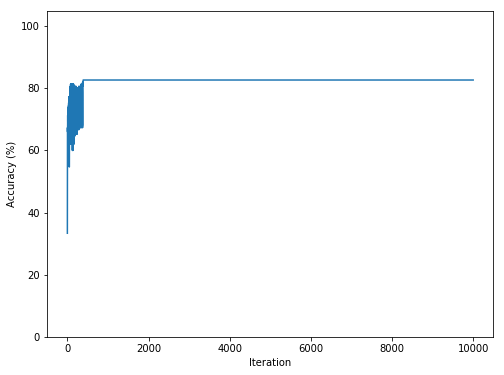

In [15]:
print('Accuracy using current parameters: %4.2f%%' % p2._acc)
plt.figure(figsize=(8,6))
plt.xlabel('Iteration')
plt.ylabel('Accuracy (%)')
plt.ylim(0,105)
plt.plot(p2._accuracy_tracker)

Note that 100% accuracy was never achieved for this classifier, the upper limit appears to be just over 80%.

# Calculate the decision boundary and plot it.

In [16]:
y1 = get_y_decision_boundary(x_min, p2)
y2 = get_y_decision_boundary(x_max, p2)

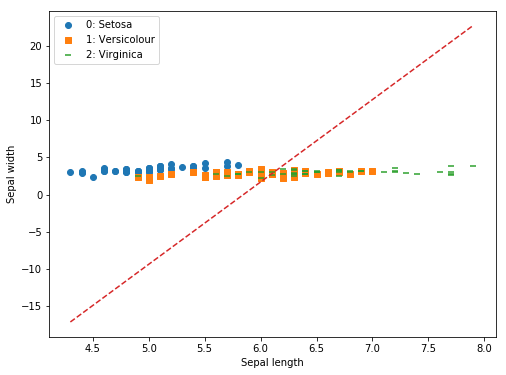

In [17]:
make_plot()
plt.plot([x_min,x_max], [y1,y2], ls='dashed', c='tab:red')

# Discuss the results in the cell below. How did the two perceptrons compare? 

The first perceptron was able to completely separate the Setosa from the Not-Setosa class. The maximum achievable accuracy of the classifier was 100%, and this is due to the fact that the classes are linearly separable, and there is no overlap between classes.

The second perceptron was not able to completely separate the Virginica from the Not-Virginica class. The maximum achievable accuracy was approximately 83%, and this is due to the fact that the classes are not linearly separable, and there is significant overalap between the classes. In fact, some observations contained the same features but were assigned to both classes. A possible solution to this problem would be to try a different combination of features that better separate the classes, or to add hidden layers to enable a non-linear boundary.

# Conceptual Overview

The network structure of the perceptron is a very simple. It consists of a finite number of input nodes that connect to a single central node, which connects to an output node. There are weights associated with each input node, and a single bias term. Its purpose is to model any function or decision boundary that is linearly separable, such as the logical AND or OR functions, or a binary classifier that is separable with a linear boundary, such as the iris example above. 

Assuming the input consists of a matrix (X) and a vector of expected results (y), the perceptron works as follows: For each row, compute the dot product of the row with the weights, and add the bias term. If this is greater than zero, the central node outputs 1, 0 otherwise. This output is compared with the expected value in y, and the weights are updated by adding the corresponding value of x multiplied by the delta between the current and expected values. This process repeats until convergence is achieved (assuming a linearly separable function or decision boundary), or until the desired number of iterations has passed.

As seen in the first part of the assignment, for a linearly separable dataset the model can achieve 100% accuracy given enough iterations. However, as seen in the second part, if the dataset is not linearly separable, performance will be suboptimal, and there is no way to achieve 100% accuracy. In this case, a nonlinear method would be required to achieve higher accuracy.